<h1>Dragon Real Estate - Price Predictor</h1>

# Boston House Price Predictor using ML

Project Information:
This is my 1st Machine learning Project. I am taking data of boston house pricing from kaggle and apllying machine learning
to predict prices if we have provided with new feature of a house.

Date - 16/11/2023

Time - 12:00 p.m

Author - Shrihari Thiyagarajan(VIT Vellore, CSE)

$Atrributes$

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in 1000s


## Important points to note 
1. Very small dataset has been taken
2. No fine tuning of models has been done. Only 3 models have been tried and tested. (*There is no guarantee that one model is better than the other*)

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("Boston_house_price_data.csv")

In [3]:
housing.head() #displays first 5 rows


,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,NaN,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info() #can be used to check if there is any data that is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZM       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts() #tells frequency of values
# housing.describe()

CHAS
0    471
1     35
Name: count, dtype: int64

## Plotting histogram

In [6]:

'''says we want to see our graphs here only.'''
%matplotlib inline 

In [7]:
# import matplotlib.pyplot as plt
# housing.hist(bins = 50, figsize=(20,15))
# #plt.show()  #need this outside jupyter notebook to show the graphs

<u><b>Benefit of histogram</u></b> We can analyse data overall, and check if anything is fishy, or we made an error in data somewhere 

## Train-Test Splitting

In [8]:
#For learning purpose

# import numpy as np
# def split_train_test(data,test_ratio): #fn already exists in sklearn.model_selection
#     np.random.seed(42) #fixes the permutation, so that it doesnt change in every compilation
#     shuffled= np.random.permutation(len(data)) #?
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

#train_set,test_set = split_train_test(housing,0.2)
#print(f"Rows in train set : {len(train_set)} \nRows in test set : {len(test_set)}")

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size = 0.2, random_state = 42)
print(f"Rows in train set : {len(train_set)} \nRows in test set : {len(test_set)}")


Rows in train set : 404 
Rows in test set : 102


In [10]:
'''Sometimes, we while creating training set, we might enitrely miss out few values of data
here, chas attribute has only 35entries with val=1, so if we miss them in our training set, out algorithm will completely change.
to avoid that, we use Stratified ShuffleSplit
'''
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [12]:
housing = strat_train_set.copy()

## Looking for Correlations

In [13]:
corr_matrix = housing.corr() #corr_matrix -> correlation matrix

In [14]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.678379
B          0.361761
ZM         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

**What is correlation**

if one value increases, doe the other value go up or down. This is called pearson correlation coefficient
1 => strong positive correlation
if corr >0. means that that field(corresponding to that no.)  increases when given fiel increases.

Similarly, corr<0  => reduces with increase in given field

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZM', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZM', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZM'>,
        <Axes: xlabel='RM', ylabel='ZM'>,
        <Axes: xlabel='ZM', ylabel='ZM'>,
        <Axes: xlabel='LSTAT', ylabel='ZM'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZM', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

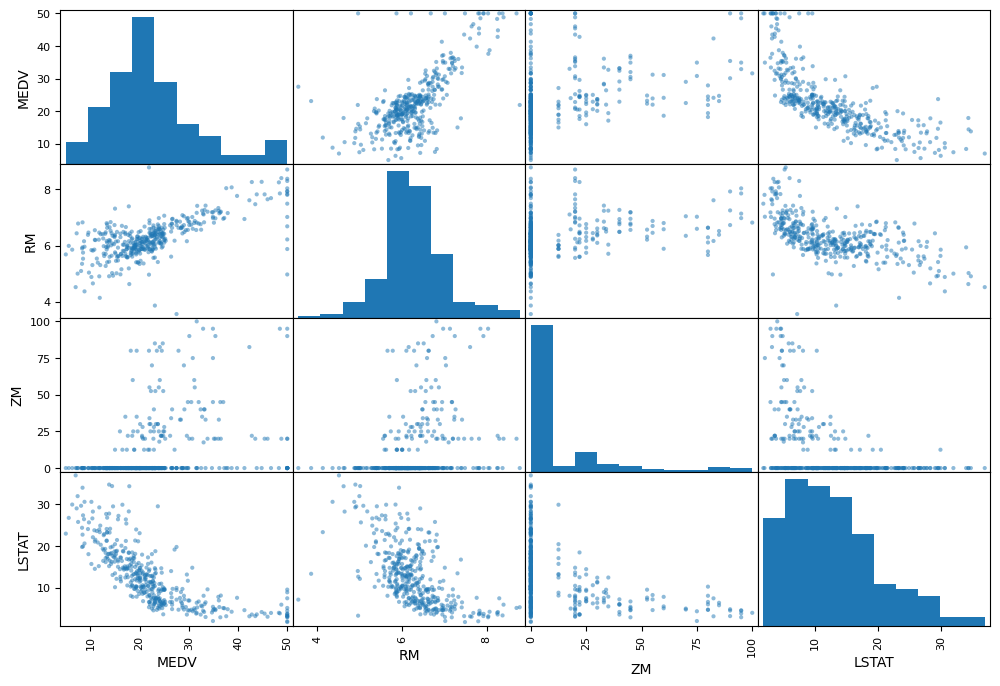

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZM","LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

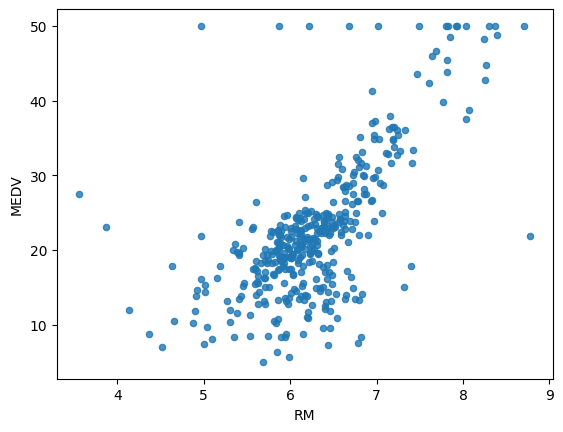

In [16]:
housing.plot(kind = "scatter", x = "RM", y = "MEDV", alpha = 0.8)

## Trying Atribute Combinations

we can create our own attributes by combining 2 attributes.

In [17]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]
housing.head()

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [18]:
corr_matrix = housing.corr() #corr_matrix -> correlation matrix
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.678379
B          0.361761
ZM         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528094
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

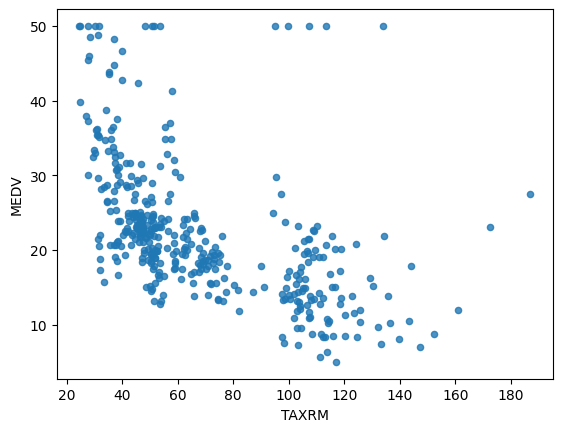

In [19]:
housing.plot(kind = "scatter", x = "TAXRM", y = "MEDV", alpha = 0.8)

In [20]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

**We have 3 options then**
1. Get Rid of the missing data points
2. Get rid of the whole attributes
3. Set the value to some value(0,mean, or median)




In [21]:
# newHousing = housing.dropna(subset = ["RM"]) #Option1
# #.dropna creates new object that drops all fields with nul values.

# housing.drop("RM",axis = 1).shape #Option2
# #drops the attribute as a whole. Orginal datafram will remain unchanged


#Option 3
median = housing["RM"].median() #returns median of that field
housing["RM"].fillna(median)

#if option 3 is taken, then those fields must be both in test and training data.(can be done using sklearn)

housing.shape


(404, 13)

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)


SimpleImputer(strategy='median')

In [23]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [24]:
X = imputer.transform(housing)

In [25]:
housing.describe()

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281424,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715555,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [26]:
housing_tr = pd.DataFrame(X,columns = housing.columns)

In [27]:
housing_tr.describe()

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280552,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711145,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

**There are 3 types of objects**
1. Estimator - It estimates some parameter based on a dataset . Eg-> Imputer
	-  **Fit method** - fits dataset and calculates parameters
	- **Transform method**
2. Transformer 
	- Takes input and returns output based on the learnings from fit(). 
	- It also has convenience function called *fit_transform()* which fits and then transforms.
3. Predictors 
	- Linear regression model is an example of predictor.
	- *fit()* and *predict()* are two common functions.
	- It also five core function which will evaluate prediction.


## Feature Scaling

Primarily, 2 types of feature scaling methods:
1. Min-max Scaling(Normalization)
    - (value-min)/(max-min)
    - sklearn provides *MinMaxScaler* for this
2. Standardization
    -  (value-mean)/std
    -  Sklearn provides a class called *StandardScaler* for this

## Creating a Pipeline
**series of steps than can be automated**

In [28]:
#feature scaling? 
# we prefer our attributes to be in the same range, to do this we do feature scaling

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

myPipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    #.... add as many as you want in your pipeline
    ('std_scaler',StandardScaler()),
])

#all the preprocessing work done above should be in pipline only


In [29]:
housing_num_tr = myPipeline.fit_transform(housing) 
#The imputing part is dont automatically buy our pipeline, so no need of housing_tr here.

In [30]:
housing_num_tr.shape

(404, 13)

## Selecting the desired model for Dragon Real Estates

In [31]:
def print_scores(scores):
    print("Scores : ",scores)
    print("Mean : ", scores.mean())
    print("Standard Deviation : ", scores.std())

#### Linear Regression model
*not that effective - mse-> ~23*

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr,housing_labels)



LinearRegression()

In [33]:
someData = housing.iloc[:5]
someLabels = housing_labels.iloc[:5]

In [34]:
preparedData = myPipeline.transform(someData)

In [35]:
model.predict(preparedData)

array([23.96425919, 27.21208062, 20.53351635, 25.0612734 , 23.78969888])

In [36]:
list(someLabels)

[21.9, 24.5, 16.7, 23.1, 23.0]

**Evaluating the model (RMSE)**

In [37]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [38]:
lin_rmse

4.840607384765462

In [39]:
# 1 2 3 4 5 6 7 8 9 10 -> 10 fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error",cv = 10)
rmse_scores = np.sqrt(-scores)
print_scores(rmse_scores)

Scores :  [4.18230525 4.27066358 5.20987652 3.83038147 5.35428866 4.39685655
 7.4583313  5.50007331 4.15943199 6.05794915]
Mean :  5.042015777405772
Standard Deviation :  1.0584676803730007


### Decision Tree Regressor model

In [40]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

someData = housing.iloc[:5]
someLabels = housing_labels.iloc[:5]

preparedData = myPipeline.transform(someData)
model.predict(preparedData)


array([21.9, 24.5, 16.7, 23.1, 23. ])

In [41]:
list(someLabels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(lin_mse)
print(mse)

0.0


0.0 means that the model has overfit our training model. 

#### Cross Validation - Using better evaluation technique

In [43]:
# 1 2 3 4 5 6 7 8 9 10 -> 10 fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error",cv = 10)
rmse_scores = np.sqrt(-scores)


In [44]:
rmse_scores

array([3.73598193, 5.73891296, 5.49387686, 4.01816   , 3.70077695,
       3.86726648, 7.70564728, 3.89172198, 3.60065966, 4.29429855])

In [45]:
print_scores(rmse_scores)

Scores :  [3.73598193 5.73891296 5.49387686 4.01816    3.70077695 3.86726648
 7.70564728 3.89172198 3.60065966 4.29429855]
Mean :  4.604730263533208
Standard Deviation :  1.2556001597152664


### Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

someData = housing.iloc[:5]
someLabels = housing_labels.iloc[:5]

preparedData = myPipeline.transform(someData)
model.predict(preparedData)


array([22.331, 25.748, 16.055, 23.501, 23.432])

In [47]:
list(someLabels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(lin_mse)
print(mse)

1.4668429678217791


In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error",cv = 10)
rmse_scores = np.sqrt(-scores)
print_scores(rmse_scores)

Scores :  [2.85793122 2.60417484 4.43684189 2.45068685 3.30453024 2.65228816
 4.82643151 3.36279952 2.93712499 3.29949029]
Mean :  3.273229949923734
Standard Deviation :  0.7464140967483832


## Saving the Model

In [51]:
from joblib import dump, load
dump(model, 'Dragon.joblib')  #creates a model

['Dragon.joblib']

## Testing the Model on Test Data

In [56]:
X_test = strat_test_set.drop(["MEDV"],axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = myPipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test)) #these are very good results

[25.001 11.163 26.265 22.139 18.759 14.942 20.297 14.496 31.871 41.912
 19.723 10.874 23.514 27.154 19.334 10.95  31.458 14.201 23.725 19.398
 20.109 17.747 17.339 22.352 18.665 31.823 15.822 33.251  8.58  33.967
 23.104 21.605 22.734 10.509 21.016 11.211 43.339 24.428 23.593 42.045
 24.215 29.779 20.596 20.862 18.654 33.298 44.719 20.194 20.416 21.877
 21.277 14.403 21.235 15.033 25.673 33.818 42.598 28.796 19.466 20.949
 46.769  9.999 19.081 25.741 14.628 33.601 20.144 17.865 19.287 34.444
 24.954 22.676 21.329 22.172 34.764 13.041 16.023 20.166 20.719 21.771
 22.426 21.288 14.095 22.409 20.565 21.209 14.187 21.077 21.814 23.131
 18.697 27.197  7.234 26.072 19.771 28.779 19.703 31.439 14.364 26.612
 21.433 20.358] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [54]:
final_rmse

2.9007779737410395

## Using the model

In [58]:
preparedData[0] ## we aare going to use this data in ModelUsage notebook

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24294044, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [60]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 

In [61]:
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24294044, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.331])